# The Sparks Foundation

# Task1: PREDICTION USING SUPERVISED ML

#### Predict the percentage of an student based on the number of study hours. This is a simple linear Regression task as it involves just 2 variables

# Author: Laeeq Ahmad

## 1. Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.shape

(25, 2)

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## Summary Statistics

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Checking Null Values

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Creating Independent and Dependent Variable

In [9]:
X = df.drop(["Scores"], axis = 1)
Y = df[["Scores"]]

In [10]:
X.shape

(25, 1)

In [11]:
Y.shape

(25, 1)

### Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled_minmax, columns = X.columns)
X.head()

,Hours
0,0.172840
1,0.493827
2,0.259259
3,0.913580
4,0.296296


### Train Test Splitting

<img src='train_test_split1.png' width=80%, height=80% >

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = .2, random_state = 25, shuffle= True)

### Training Model, Predicting & Testing

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(xtrain, ytrain)

LinearRegression()

In [18]:
pred = model.predict(xtest)

In [19]:
pred

array([[34.03971182],
       [29.26890983],
       [21.63562663],
       [76.97692978],
       [49.3062782 ]])

### Checking r2 by sklearn metric

In [20]:
from sklearn.metrics import r2_score

In [21]:
test_r2 = r2_score(ytest, pred)

In [22]:
train_r2 = r2_score(ytrain,model.predict(xtrain))

In [23]:
print('R2 score for training:',train_r2 )
print('R2 score for testing:',test_r2 )

R2 score for training: 0.9526743156185515
R2 score for testing: 0.9434635261365242


### Cross Validation

<img src='https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/07_cross_validation_diagram.png' width=200, height=400 >

In [24]:
from sklearn.model_selection import cross_val_score

In [27]:
scores = cross_val_score(model, xtrain, ytrain, cv=5)

In [28]:
print(scores)

[0.95695951 0.96357034 0.44999272 0.95091961 0.92516117]


In [29]:
print(scores.mean())

0.8493206689897927


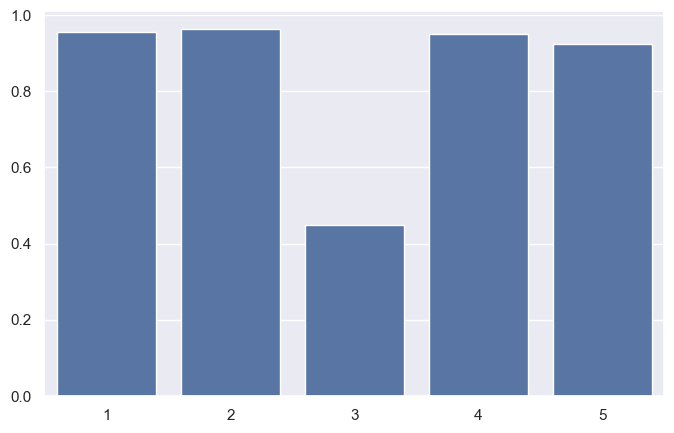

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1,len(scores)+1)),y=scores, color='b')
plt.show()